## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

In [57]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

**Why I chose these variables?**
Variables Chosen: Year, ID (keeping track) - note I might end up removing this because it is not super necessary for what I am doing), Marital (Status), Childs (Number of children), Educ (years of education received), Sex (female or male), Race, and Family16 (what were the living conditions of the individual at 16; who were they living with?)
I chose variables that are very vague and can be messed around with in different ways- i.e. seeing if certain variables influence other variables or even peeking into specifics of one variable and how proportions break down within that. These are variables I find personable and was interested in seeing different histograms and  proportion breakdowns of. 
I think there are always interesting trends or discoveries in data that contain race and sex as well- wanted to see what I could find out with some data inspection.
Additionally, I was curious to see what the relation to working status and education was and if there was correlation between number of children and marital status. 

In [ ]:
df = pd.read_excel("./GSS.xlsx") #loading in data (downloaded as an excel sheet with just metadata)- researched and found this was best for pandas reading it in

In [4]:
df.head() #inspecting data

,year,id_,wrkstat,marital,childs,educ,sex,race,family16
0,1972,1,Working full time,Never married,0,4 years of college,FEMALE,White,FATHER
1,1972,2,Retired,Married,5,10th grade,MALE,White,M AND F RELATIVES
2,1972,3,Working part time,Married,4,12th grade,FEMALE,White,MOTHER & FATHER
3,1972,4,Working full time,Married,0,5 years of college,FEMALE,White,MOTHER & FATHER
4,1972,5,Keeping house,Married,2,12th grade,FEMALE,White,MOTHER & FATHER


In [124]:
#Focus on more modern data
df['year'] = pd.to_numeric(df['year'], errors='coerce')  # Convert to float, set invalid values to NaN
df = df.dropna(subset=['year']) 
df = df[df['year'] >= 1990] 


In [125]:
df['race'].value_counts()

#Removing Non-answers/Not Helpful Data
remove_race = ['.i:  Inapplicable']
df = df[~df['race'].isin(remove_race)]

#Note- I wish Other was more specific- would allow for more number summaries + graphs


In [126]:
df['marital'].value_counts()

#Getting Rid of Unhelpful Responses
removing_marital = ['.n:  No answer', '.s:  Skipped on Web', '.d:  Do not Know/Cannot Choose' ]
df = df[~df['marital'].isin(removing_marital)]

#Grouping Separated and Divorced because for analysis they most likely have similar effects/implications for most things, especially because my variables are not dealing with financial aspects
df['marital'] = df['marital'].replace({'Separated' : 'Not Together', 'Divorced': 'Not Together'})




In [127]:
df['marital'].value_counts()

marital
Married          20480
Never married    10807
Not Together      8114
Widowed           3763
Name: count, dtype: int64

<Axes: >

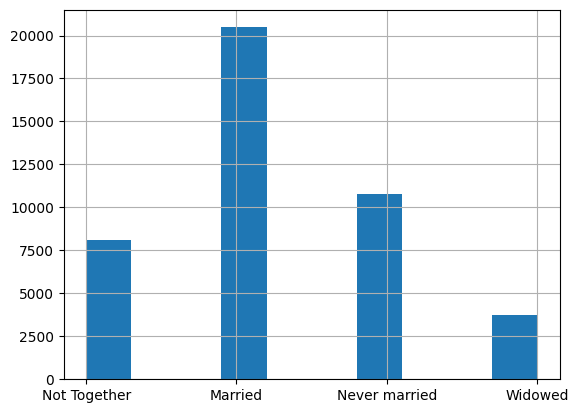

In [128]:
df['marital'].hist()

In [129]:
#Getting rid of unhelpful/not insightful data
remove_family16 = ['.i:  Inapplicable', 'OTHER', '.n:  No answer', '.s:  Skipped on Web', '.d:  Do not Know/Cannot Choose']
df = df[~df['family16'].isin(remove_family16)]

#Grouping similar answers for simplicity
df['family16'] = df['family16'].replace({'MOTHER & STPFATHER' : 'PARENT & STPPARENT', 'FATHER & STPMOTHER': 'PARENT & STPPARENT'})


In [130]:
df['family16'].value_counts()

family16
MOTHER & FATHER       30439
MOTHER                 6401
PARENT & STPPARENT     3466
FATHER                 1088
M AND F RELATIVES       942
FEMALE RELATIVE         687
MALE RELATIVE           141
Name: count, dtype: int64

In [121]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')  # Convert to float, set invalid values to NaN
df = df.dropna(subset=['year']) 
df = df[df['year'] >= 1990] 



In [132]:
print(df.columns.tolist())

['year', 'id_', 'wrkstat', 'marital', 'childs', 'educ', 'sex', 'race', 'family16']


In [133]:
df['wrkstat'].value_counts()

wrkstat
Working full time                                                             21557
Retired                                                                        7393
Working part time                                                              4626
Keeping house                                                                  4548
Unemployed, laid off, looking for work                                         1672
In school                                                                      1329
Other                                                                          1108
With a job, but not at work because of temporary illness, vacation, strike      909
.n:  No answer                                                                   14
.s:  Skipped on Web                                                               7
.d:  Do not Know/Cannot Choose                                                    1
Name: count, dtype: int64

In [134]:

df['wrkstat'] = df['wrkstat'].astype(str).str.strip()
unwanted_responses = [".n:  No answer", ".s:  Skipped on Web", ".d:  Do not Know/Cannot Choose"]

df = df[~df['wrkstat'].isin(unwanted_responses)]

print(df['wrkstat'].value_counts()) 

wrkstat
Working full time                                                             21557
Retired                                                                        7393
Working part time                                                              4626
Keeping house                                                                  4548
Unemployed, laid off, looking for work                                         1672
In school                                                                      1329
Other                                                                          1108
With a job, but not at work because of temporary illness, vacation, strike      909
Name: count, dtype: int64


I wish the unemployed, laid off, looking for work were separated or more specific

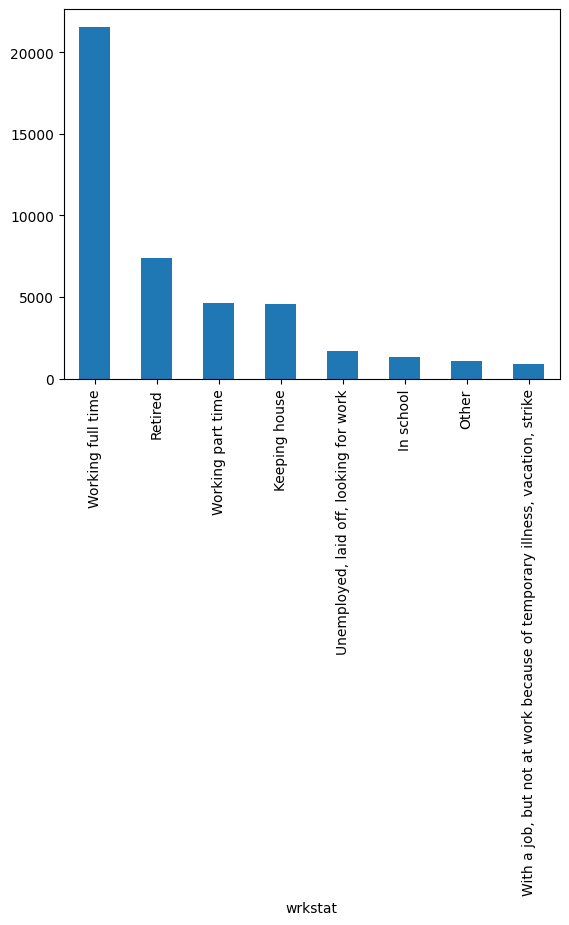

In [135]:
#Histogram of Work Status with Cleaned Data
df['wrkstat'].value_counts().plot(kind='bar')
  # Rotate labels if needed
plt.show()

In [150]:
unemployed = (df['wrkstat'] == 'Unemployed, laid off, looking for work').sum()
total = (df['wrkstat'] == df['wrkstat']).sum()
unemployed.dtype
proportion_unemployed = (unemployed / total) * 100
print("Proportion of Individuals that are Unemployed: ", proportion_unemployed, '%')

Proportion of Individuals that are Unemployed:  3.8755736868944415 %


This number seems low compared to what I think most would expect for an actual unemployment rate. This is because I did not remove retired people, people staying at home, people in school, other, or those on strike (unemployment rate for government/economic purposes must mean individuals are looking for work)

In [152]:
females = (df['sex'] == 'FEMALE').sum()
males = (df['sex'] == 'MALE').sum()
print('Females: ', females)
print('Males :', males)


Females:  23881
Males : 19158


In [153]:
df['childs'].value_counts()

childs
0                                 12267
2                                 11332
1                                  6912
3                                  6677
4                                  3185
5                                  1291
6                                   630
8 or more                           388
7                                   325
.d:  Do not Know/Cannot Choose       87
.n:  No answer                       25
.i:  Inapplicable                    12
.s:  Skipped on Web                  11
Name: count, dtype: int64

In [154]:
unwanted_childs_responses = [".n:  No answer", ".i:  Inapplicable", ".s:  Skipped on Web", ".d:  Do not Know/Cannot Choose"]

df = df[~df['childs'].isin(unwanted_childs_responses)]

/var/folders/pk/1_27cr594ss_8ffd3wymy47c0000gq/T/ipykernel_14424/2751407850.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['childs'].fillna(df['childs'].replace({"8 or more": 8}), inplace=True)


<Axes: >

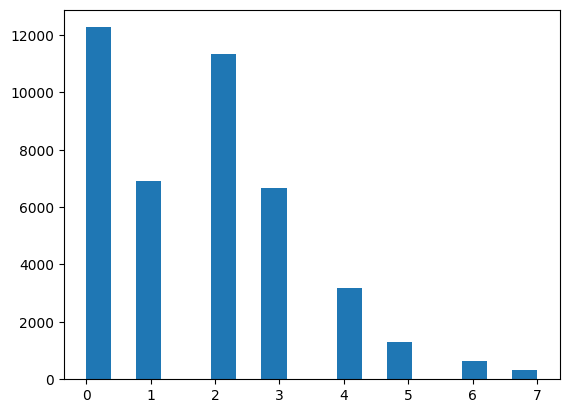

In [157]:
#Simple histogram of number of children- fixed 8 or more because it was string and coerced to numeric because it ordered the x-axis alphabetically, which goes against cognitive shortcuts
#and logical interpretation of a graph
df['childs'] = pd.to_numeric(df['childs'], errors='coerce')
df['childs'].fillna(df['childs'].replace({"8 or more": 8}), inplace=True)
df['childs'].hist(bins=18,grid=False)

In [201]:
married_no_child = ((df['marital'] == 'Married') & (df['childs'] == 0)).sum()
married = (df['marital'] == 'Married').sum()
proportion_married_no_child = married_no_child / married * 100
print('Percentage of Married people with no children:', proportion_married_no_child, '%')

Percentage of Married people with no children: 14.155474953435936 %


This is a low number, like I expected. 

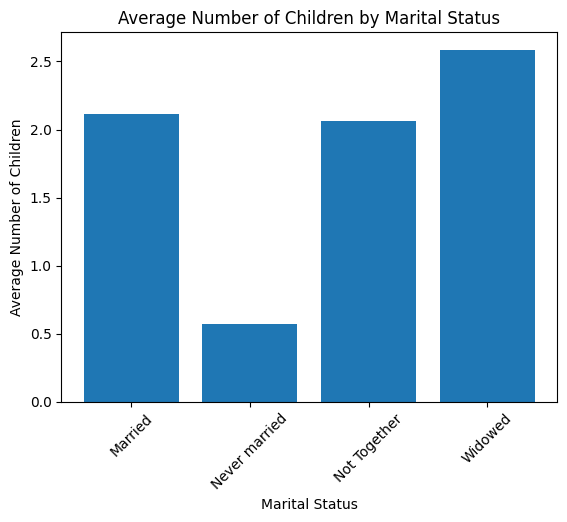

In [202]:
marital_counts = df.groupby('marital')['childs'].mean()  # or .sum()

#Displaying the average number of children by marital status
plt.bar(marital_counts.index, marital_counts.values)
plt.xlabel('Marital Status')
plt.ylabel('Average Number of Children')
plt.title('Average Number of Children by Marital Status')
plt.xticks(rotation=45)  # Rotate labels if needed
plt.show()

In [198]:
not_married = (df['marital'] == 'Never married').sum()

The widowed average might be higher because the people were older- married people could still be in the process of having more children. 

In [176]:
#Cleaning Education variable
df['educ'].value_counts()

unwanted = ['.n:  No answer', '.d:  Do not Know/Cannot Choose']

df = df[~df['educ'].isin(unwanted)]

In [177]:
df['educ'].value_counts()

educ
12th grade                    11945
4 years of college             7198
2 years of college             5559
1 year of college              3781
6 years of college             2254
3 years of college             2248
11th grade                     1966
5 years of college             1682
8 or more years of college     1390
10th grade                     1278
9th grade                       900
8th grade                       885
7 years of college              808
6th grade                       367
7th grade                       256
5th grade                       119
4th grade                        97
3rd grade                        88
2nd grade                        75
No formal schooling              73
1st grade                        13
Name: count, dtype: int64

/var/folders/pk/1_27cr594ss_8ffd3wymy47c0000gq/T/ipykernel_14424/2062095031.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(['educ', 'wrkstat']).size().reset_index(name='count')


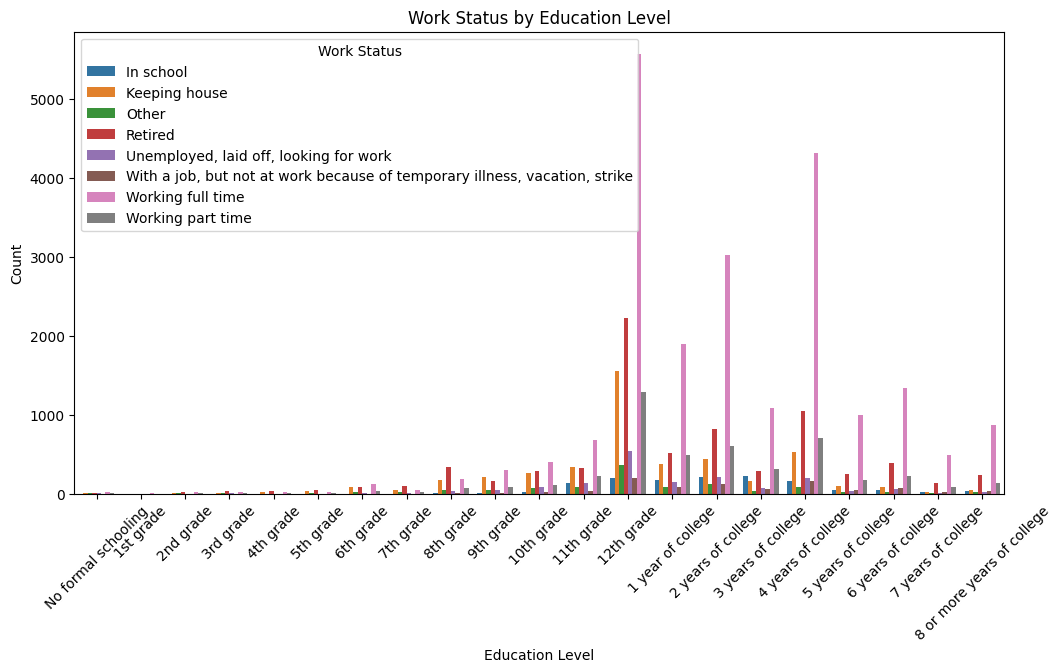

In [178]:
#Manually fixing ordering of education
educ_order = [
    "No formal schooling", "1st grade", "2nd grade", "3rd grade", "4th grade",
    "5th grade", "6th grade", "7th grade", "8th grade", "9th grade",
    "10th grade", "11th grade", "12th grade", "1 year of college",
    "2 years of college", "3 years of college", "4 years of college",
    "5 years of college", "6 years of college", "7 years of college",
    "8 or more years of college"
]

#Change order to match actual levels of schooling 
df['educ'] = pd.Categorical(df['educ'], categories=educ_order, ordered=True)

#Sort DF
df = df.sort_values('educ')

df_grouped = df.groupby(['educ', 'wrkstat']).size().reset_index(name='count')

#Bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=df_grouped, x="educ", y="count", hue="wrkstat")

plt.xticks(rotation=45)
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.title("Work Status by Education Level")
plt.legend(title="Work Status")
plt.show()

Interesting tha both employment and unemployment are highest for 12th grade as highest form of education.
Also employment matches up with assumption that some form of college education will increase chances of employment.
This graph may be misleading because the proportion of people who have received 8 or more years of college is probably lower than those who have received 4 or more years of college. This may cause employment to look low for the more educated people even if almost all of the people with that level of education are employed. Let's create a graph that shows proportions instead. 

/var/folders/pk/1_27cr594ss_8ffd3wymy47c0000gq/T/ipykernel_14424/3340815230.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(['educ', 'wrkstat']).size().reset_index(name='count')
/var/folders/pk/1_27cr594ss_8ffd3wymy47c0000gq/T/ipykernel_14424/3340815230.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped['proportion'] = df_grouped.groupby('educ')['count'].transform(lambda x: x / x.sum())


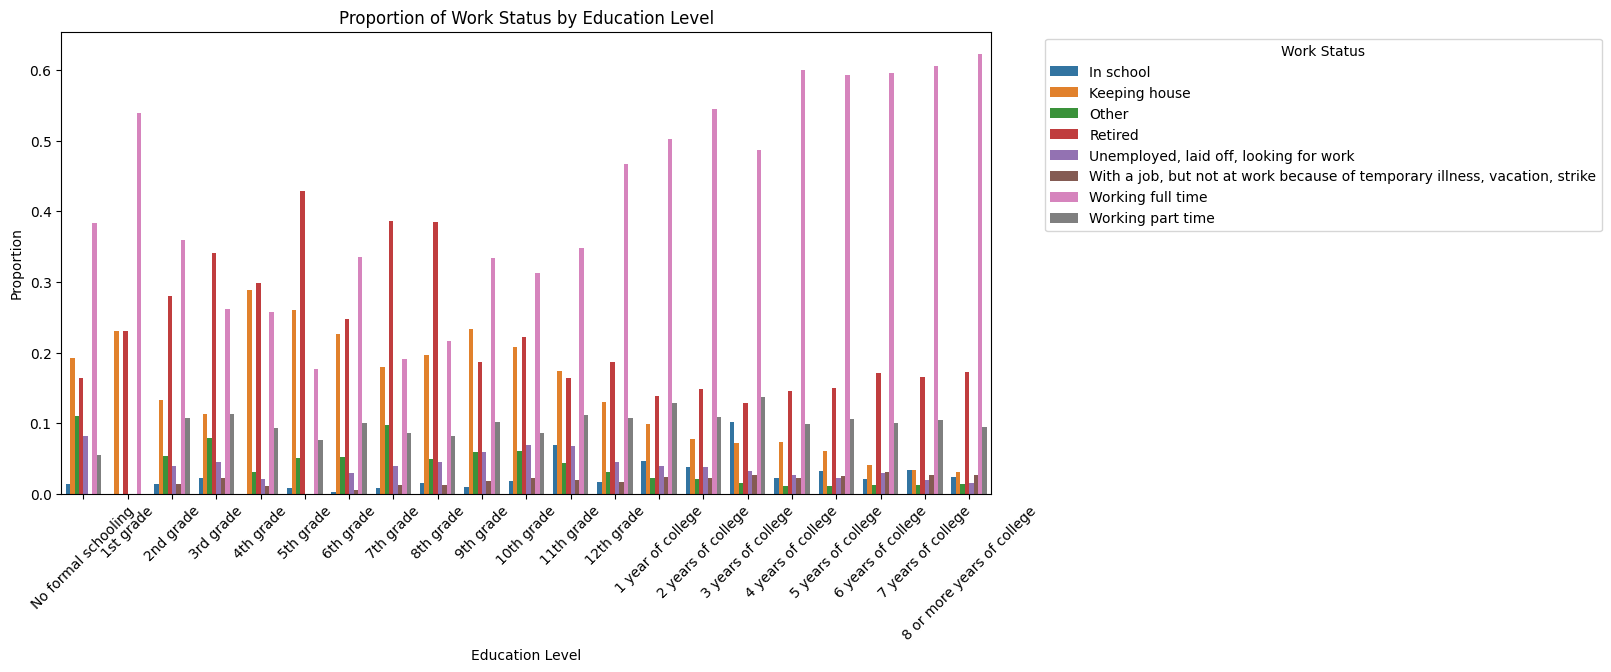

In [179]:
df_grouped = df.groupby(['educ', 'wrkstat']).size().reset_index(name='count')

# Calculate total count per education level
df_grouped['proportion'] = df_grouped.groupby('educ')['count'].transform(lambda x: x / x.sum())

# Create the bar plot with proportions
plt.figure(figsize=(12, 6))
sns.barplot(data=df_grouped, x="educ", y="proportion", hue="wrkstat")

# Formatting
plt.xticks(rotation=45)
plt.xlabel("Education Level")
plt.ylabel("Proportion")
plt.title("Proportion of Work Status by Education Level")
#Moving legend off of plot area because it takes up too much space
plt.legend(title="Work Status", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

As I suspected, this graph reveals that the proportion of full time employment is actually highest for people with the most education. Unemployment is kind of steady around .15/.20, though, after high school. This would be interesting to dive into with a question asking why someone is unemployed.
I am shocked by how high the proportion of employed people is for no formal schooling and 1st grade- however, this graph has flip problem of making employment look high for uneducated individuals, when on the graph with cumulative numbers, the bars up to 7th grade are almost not visible.

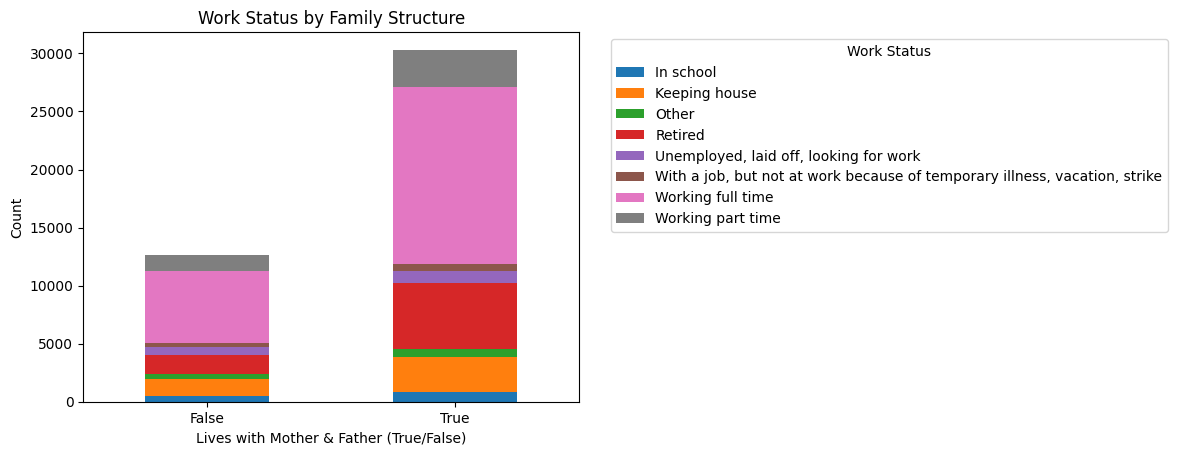

In [183]:
df['is_mother_father'] = df['family16'] == 'MOTHER & FATHER'
wrkstat_counts = df.groupby(['is_mother_father', 'wrkstat']).size().unstack()

# Plot
wrkstat_counts.plot(kind='bar', stacked=True)
plt.xlabel('Lives with Mother & Father (True/False)')
plt.ylabel('Count')
plt.title('Work Status by Family Structure')
plt.xticks(rotation=0)
plt.legend(title='Work Status', bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()


This is another instance in which I think age would be interesting to look at for age of retirement.

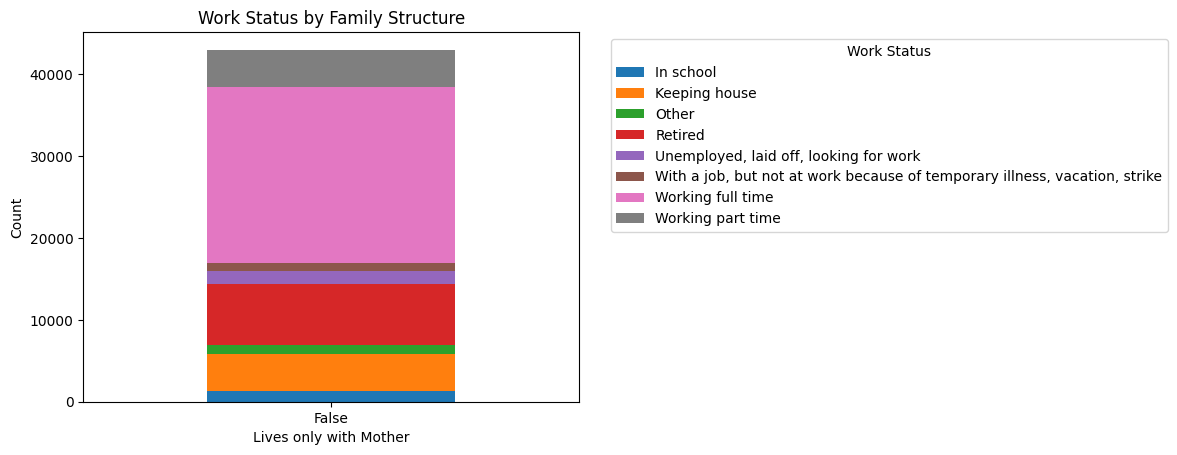

In [185]:
df['other'] = df['family16'] == 'Mother'
wrkstat_counts = df.groupby(['other', 'wrkstat']).size().unstack()

# Plot
wrkstat_counts.plot(kind='bar', stacked=True)
plt.xlabel('Lives only with Mother')
plt.ylabel('Count')
plt.title('Work Status by Family Structure')
plt.xticks(rotation=0)
plt.legend(title='Work Status', bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

<Axes: >

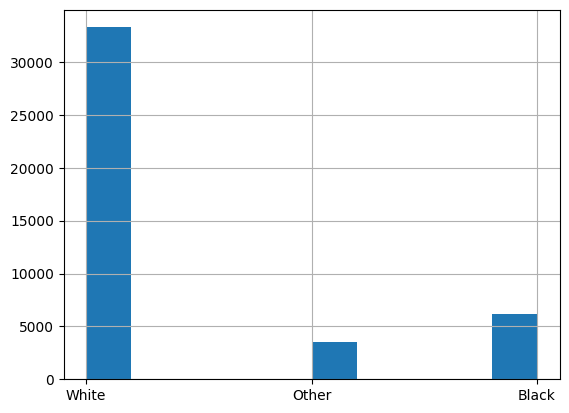

In [186]:
df['race'].hist()

This histogram makes it hard to compare numbers directly, and honestly, I would definitely say more data for race == Black or race == Other would be needed for good analysis.

In [206]:
# People whose parents were NOT together at 16
not_together_at_16 = df[df['family16'] == 'Not Together']

# Among them, count how many are currently married
married_now = (not_together_at_16['marital'] == 'Married').sum()

# Total individuals in this group
total_not_together = len(not_together_at_16)

# Calculate proportion (avoid division by zero)
if total_not_together > 0:
    proportion_married = (married_now / total_not_together) * 100
    print('Proportion of people whose parents were not together at 16 and are now married', proportion_married, '%')
else:
    print("No individuals whose parents were not together at 16.")


No individuals whose parents were not together at 16.


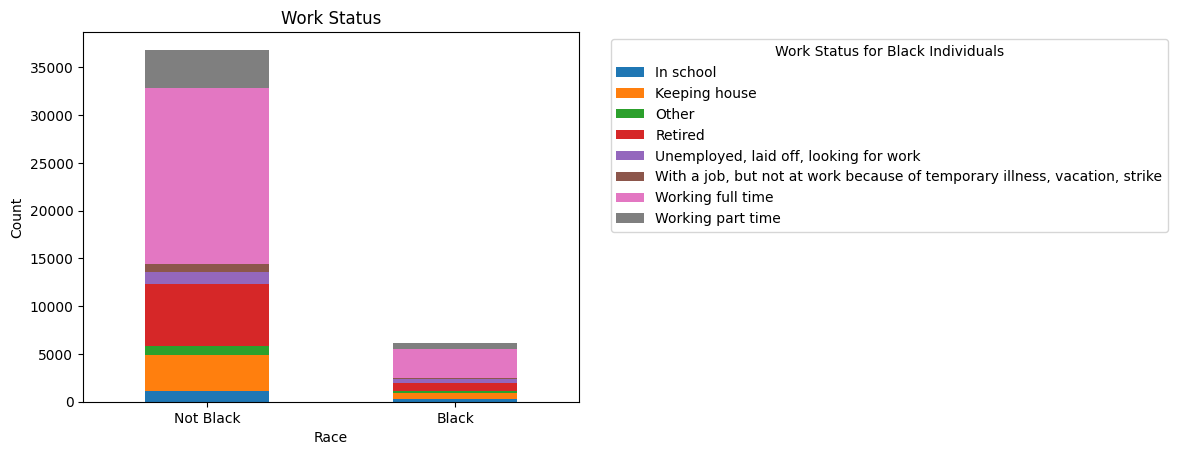

In [191]:
df['Black'] = df['race'] == 'Black'
race_workstat = df.groupby(['Black', 'wrkstat']).size().unstack()

race_workstat.index = ['Not Black', 'Black']
race_workstat.plot(kind='bar', stacked=True)
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Work Status')
plt.xticks(rotation=0)
plt.legend(title='Work Status for Black Individuals', bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

This graph is hard to draw conclusions from because the proportion of Black people is significantly less. Let's graph proportions instead.

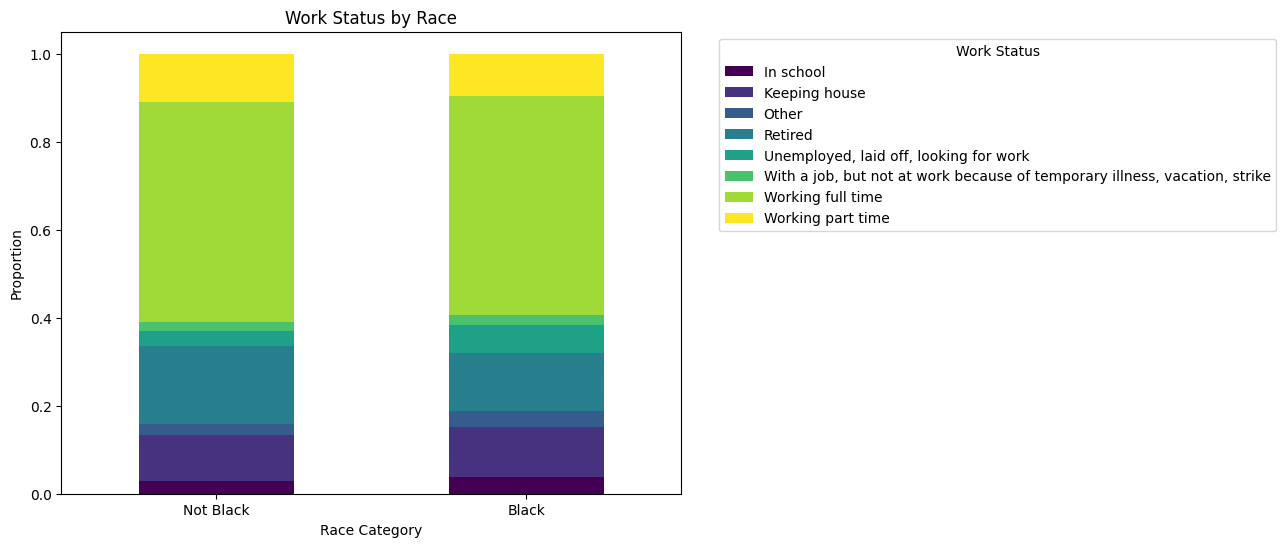

In [195]:
#Convert counts to proportions within each racial group
race_workstat = race_workstat.div(race_workstat.sum(axis=1), axis=0)
race_workstat.index = ['Not Black', 'Black']
# Plot stacked bar chart
race_workstat.plot(kind='bar', stacked=True, figsize=(8, 6), colormap="viridis")

#Change Labels
plt.xlabel('Race Category')
plt.ylabel('Proportion')
plt.title('Work Status by Race')
plt.xticks(rotation=0)
plt.legend(title='Work Status', bbox_to_anchor=(1.05, 1), loc="upper left")

# Show plot
plt.show()


This graph is much more telling- the proportions for work status are extremely similar for Black people and not Black people. The graph above plotting just numbers is deceiving.

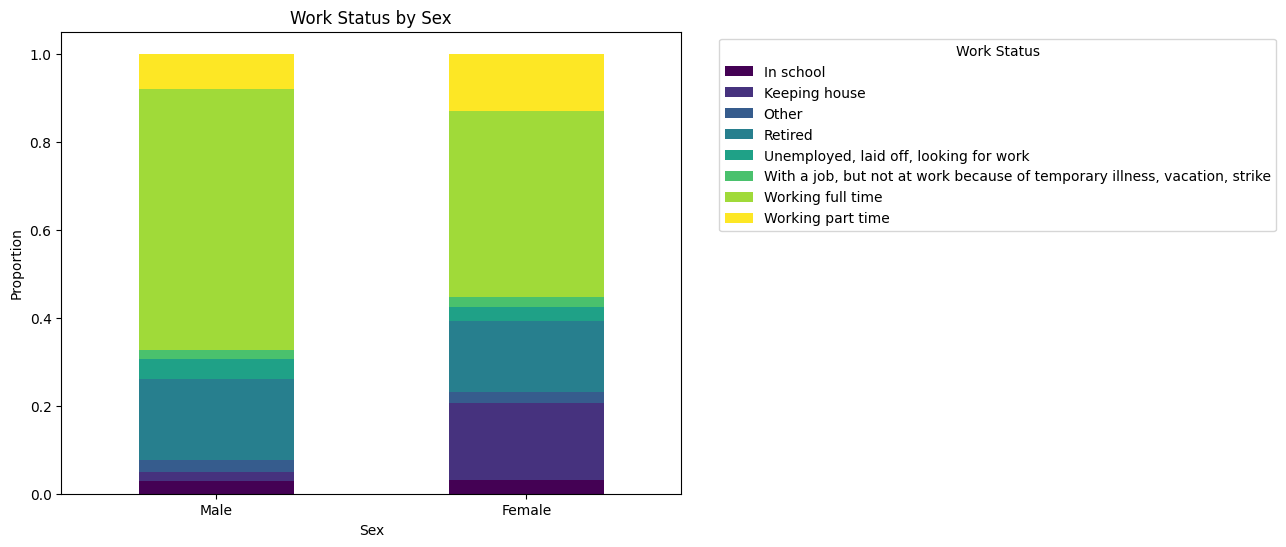

In [197]:
df['female'] = df['sex'] == 'FEMALE'
sex_workstat = df.groupby(['female', 'wrkstat']).size().unstack()
sex_workstat = sex_workstat.div(sex_workstat.sum(axis=1), axis=0)
sex_workstat.index = ['Male', 'Female']
# Plot stacked bar chart
sex_workstat.plot(kind='bar', stacked=True, figsize=(8, 6), colormap="viridis")

#Change Labels
plt.xlabel('Sex')
plt.ylabel('Proportion')
plt.title('Work Status by Sex')
plt.xticks(rotation=0)
plt.legend(title='Work Status', bbox_to_anchor=(1.05, 1), loc="upper left")

# Show plot
plt.show()

This graph displays work status proportions by sex, which reveals two known trends/stereotypes- more women are staying at home and working part time. There are also more women retired. I am assuming this is because of domestic roles. 

Important Discoveries:

Stats:

1. Around 14% of married people have no children.
2. Widowed individuals have a higher average number of children than married people- age could be influencing this.
3. Black and not Black work status distributions are similar.
4. Employment proportions are highest when education is at least 12th grade, with exceptions for No formal schooling and first grade. There is little data to look at for this, so I am not sure why this is true. It would be interesting to see what the employment type is.
5. More women stay at home, work part time, or are retired when compared proportionally to men.
6. Significantly more White people filled out this form than Black people or non-white people.
7. There is not one person whose parents were Not Together at 16 that is married now. (This displays how family life in adolescence impacts relationship choices)

Graphing:

1. Getting rid of unhelpful or non-answers is important for statistical analysis.
2. Proportion is safer than cumulative numbers, but can also be misleading if one category does not have a lot of data.
3. Replacing values or combining two values into one is helpful depending on what you are trying to accomplish. 
4. Knowing what you want to get out of data makes this process a lot faster.